# Load the librairies

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Display the dataset

In [254]:
df = pd.read_csv("data - etude de cas.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Info about the dataset

In [255]:
df.shape

(10886, 12)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [257]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [258]:
# All features are numerical except datetime column, there is no NaN values.

In [259]:
# Select only the columns with numerical values and retrieve some interesting information
df[["temp", "atemp", "humidity", "windspeed"]].describe()

,temp,atemp,humidity,windspeed
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395
std,7.79159,8.474601,19.245033,8.164537
min,0.82000,0.760000,0.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500
50%,20.50000,24.240000,62.000000,12.998000
75%,26.24000,31.060000,77.000000,16.997900
max,41.00000,45.455000,100.000000,56.996900


In [260]:
# Thanks to this describe method we can observe that:
    # - the data seems correct, there is no outliers from those features but we could perform boxplot to visualize it

# Exploratory Data Analysis

In [261]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [262]:
# We want to create new features from this dataset:
# - trasnform the datetime column into datetime object
# - Create new feature from datetime column (Hour and Weekday)
# - create some ratio with casual/registered users comparing to the total count of users

In [263]:
df["datetime"] = pd.to_datetime(df.datetime)
df.datetime.dtypes

dtype('<M8[ns]')

In [264]:
df["year"] = df.datetime.dt.year
df["month_name"] = df.datetime.dt.month_name()
df["month"] = df.datetime.dt.month
df["weekday_name"] = df.datetime.dt.weekday_name
df["weekday"] = df.datetime.dt.weekday
df["day"] = df.datetime.dt.day
df["hour"] = df.datetime.dt.hour

In [265]:
# We want to know for how long tha data has been collected:
df.datetime.min(), df.datetime.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [266]:
# We have almost two years of data, this is quite enough to perform some calculation

In [267]:
# let's display the dataset
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,weekday_name,weekday,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,Saturday,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,Saturday,5,1,4


In [268]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [269]:
# To have a better understanding of the data, we will replace the numeric values by explicit values
df.holiday = df.holiday.replace([0], ["No"]).replace([1], ["Yes"])
df.workingday = df.workingday.replace([0], ["No"]).replace([1], ["Yes"])
df.weather = df.weather.replace([1], ["Dégagé à nuageux"]).replace([2], ["Brouillard"]).replace([3], ["Légère pluie ou neige"]).replace([4], ["Fortes averses ou neiges"])

In [270]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,weekday_name,weekday,day,hour
0,2011-01-01 00:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday,5,1,0
1,2011-01-01 01:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday,5,1,1
2,2011-01-01 02:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday,5,1,2
3,2011-01-01 03:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,3,10,13,2011,January,1,Saturday,5,1,3
4,2011-01-01 04:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,0,1,1,2011,January,1,Saturday,5,1,4


In [271]:
df.groupby(["month_name", "year"]).hour.count().unstack()

year,2011,2012
month_name,,
April,455,454
August,456,456
December,456,456
February,446,455
January,431,453
July,456,456
June,456,456
March,446,455
May,456,456


In [272]:
# We want to create a pivot table where where can find the mean value of users per weekday and hours

week_hour_df = round(df.pivot_table(index="hour", columns="weekday_name", values="count", aggfunc="mean", margins=True, margins_name="Total"))
week_hour_df

weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Total
hour,,,,,,,,
0,53.0,35.0,98.0,96.0,37.0,27.0,36.0,55.0
1,24.0,18.0,70.0,79.0,15.0,12.0,16.0,34.0
2,13.0,11.0,50.0,62.0,8.0,6.0,8.0,23.0
3,6.0,6.0,23.0,30.0,5.0,4.0,5.0,12.0
4,6.0,6.0,8.0,10.0,5.0,5.0,5.0,6.0
5,23.0,22.0,9.0,9.0,26.0,24.0,25.0,20.0
6,91.0,89.0,21.0,15.0,108.0,105.0,106.0,76.0
7,254.0,260.0,47.0,35.0,308.0,298.0,297.0,213.0
8,470.0,428.0,118.0,84.0,497.0,469.0,485.0,363.0


In [273]:
start_winter_11 = "2011-01-01 00:00:00"
end_winter_11 = "2011-03-20 23:00:00"

start_spring_11 = "2011-03-21 23:00:00"
end_spring_11 = "2011-06-20 23:00:00"

start_summer_11 = "2011-06-21 23:00:00"
end_summer_11 = "2011-09-20 23:00:00"

start_fall_11 = "2011-09-21 23:00:00"
end_fall_11 = "2011-12-20 23:00:00"

# We do the same for 2012

start_winter_12 = "2012-12-21 00:00:00"
end_winter_12 = "2012-03-20 23:00:00"

start_spring_12 = "2012-03-21 23:00:00"
end_spring_12 = "2012-06-20 23:00:00"

start_summer_12 = "2012-06-21 23:00:00"
end_summer_12 = "2012-09-20 23:00:00"

start_fall_12 = "2012-09-21 23:00:00"
end_fall_12 = "2012-12-20 23:00:00"

In [274]:
winter_index_11 = (df.loc[(df.datetime >= start_winter_11) & (df.datetime <= end_winter_11)]).index
winter_index_12 = (df.loc[(df.datetime >= start_winter_12) & (df.datetime <= end_winter_12)]).index


spring_index_11 = (df.loc[(df.datetime >= start_spring_11) & (df.datetime <= end_spring_11)]).index
spring_index_12 = (df.loc[(df.datetime >= start_spring_12) & (df.datetime <= end_spring_12)]).index

summer_index_11 = (df.loc[(df.datetime >= start_summer_11) & (df.datetime <= end_summer_11)]).index
summer_index_12 = (df.loc[(df.datetime >= start_summer_12) & (df.datetime <= end_summer_12)]).index

fall_index_11 = (df.loc[(df.datetime >= start_fall_11) & (df.datetime <= end_fall_11)]).index
fall_index_12 = (df.loc[(df.datetime >= start_fall_12) & (df.datetime <= end_fall_12)]).index

In [275]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,weekday_name,weekday,day,hour
0,2011-01-01 00:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday,5,1,0
1,2011-01-01 01:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday,5,1,1
2,2011-01-01 02:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday,5,1,2
3,2011-01-01 03:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,3,10,13,2011,January,1,Saturday,5,1,3
4,2011-01-01 04:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,0,1,1,2011,January,1,Saturday,5,1,4


In [276]:
df["season_name"] = df.season.replace({1: "spring"}).replace({2: "summer"}).replace({"fall"}).replace({4: "winter"})

In [277]:
df.groupby("season").temp.agg(["min", "mean", "max"])

,min,mean,max
season,,,
1,0.82,12.530491,29.52
2,9.84,22.823483,38.54
3,15.58,28.789111,41.00
4,5.74,16.649239,30.34


In [278]:
df.groupby("season_name").temp.agg(["min", "mean", "max"])

,min,mean,max
season_name,,,
3,15.58,28.789111,41.00
spring,0.82,12.530491,29.52
summer,9.84,22.823483,38.54
winter,5.74,16.649239,30.34


In [279]:
df.shape

(10886, 20)

In [280]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,weekday_name,weekday,day,hour,season_name
0,2011-01-01 00:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday,5,1,0,spring
1,2011-01-01 01:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday,5,1,1,spring
2,2011-01-01 02:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday,5,1,2,spring
3,2011-01-01 03:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,3,10,13,2011,January,1,Saturday,5,1,3,spring
4,2011-01-01 04:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,0,1,1,2011,January,1,Saturday,5,1,4,spring


In [281]:
for i in winter_index_11:
    df.iat[i,19] = "winter"

In [282]:
for i in winter_index_12:
    df.iat[i,19] = "winter"

In [283]:
for i in spring_index_11:
    df.iat[i,19] = "spring"

In [284]:
for i in spring_index_12:
    df.iat[i,19] = "spring"

In [285]:
for i in summer_index_11:
    df.iat[i,19] = "summer"

In [286]:
for i in summer_index_12:
    df.iat[i,19] = "summer"

In [287]:
for i in fall_index_11:
    df.iat[i,19] = "fall"

In [288]:
for i in fall_index_12:
    df.iat[i,19] = "fall"

In [289]:
df.groupby("season").temp.agg(["min", "mean", "max"])

,min,mean,max
season,,,
1,0.82,12.530491,29.52
2,9.84,22.823483,38.54
3,15.58,28.789111,41.00
4,5.74,16.649239,30.34


In [290]:
df.groupby("season_name").count()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,weekday_name,weekday,day,hour
season_name,,,,,,,,,,,,,,,,,,,
fall,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734
spring,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096
summer,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
winter,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323


In [291]:
df.groupby("season_name").temp.agg(["min", "mean", "max"])

,min,mean,max
season_name,,,
fall,5.74,16.649239,30.34
spring,0.82,19.772090,38.54
summer,15.58,28.789111,41.00
winter,2.46,11.373394,28.70


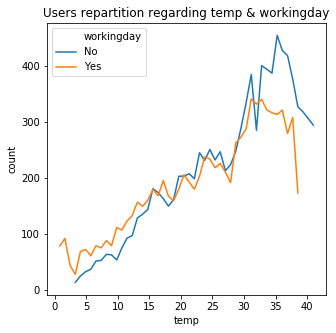

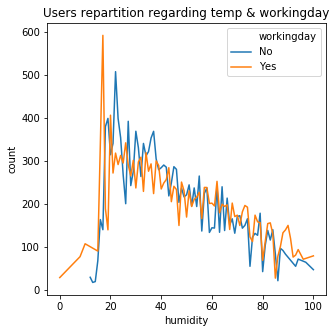

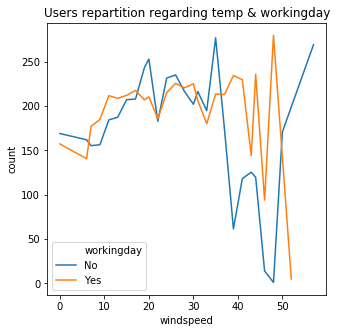

In [292]:
lst = ["temp", "humidity", "windspeed"]

for i in lst:
    plt.figure(figsize=(5,5))
    sns.lineplot(x=df[i], y="count", hue="workingday", data=df, ci=None)
    plt.title("Users repartition regarding temp & workingday")
    
    plt.show()

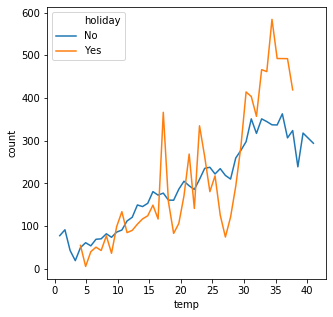

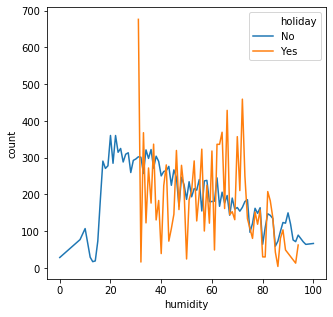

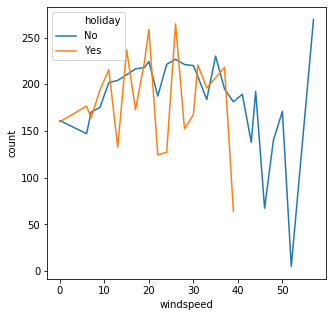

In [293]:
lst = ["temp", "humidity", "windspeed"]

for i in lst:
    plt.figure(figsize=(5,5))
    sns.lineplot(x=df[i], y="count", hue="holiday", data=df, ci=None)
    plt.show()

In [294]:
df.groupby("season_name")["datetime"].max()

season_name
fall     2012-12-19 23:00:00
spring   2012-06-19 23:00:00
summer   2012-09-19 23:00:00
winter   2011-03-19 23:00:00
Name: datetime, dtype: datetime64[ns]

In [295]:
df.groupby("season_name")["datetime"].min()

season_name
fall     2011-10-01
spring   2011-04-01
summer   2011-07-01
winter   2011-01-01
Name: datetime, dtype: datetime64[ns]

<Figure size 360x360 with 0 Axes>

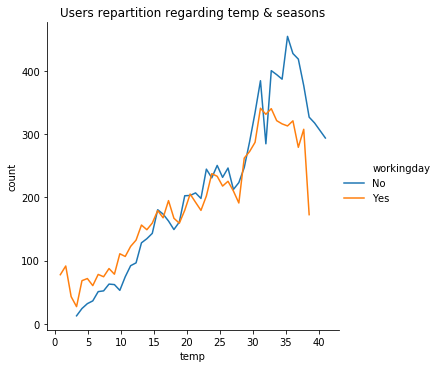

<Figure size 360x360 with 0 Axes>

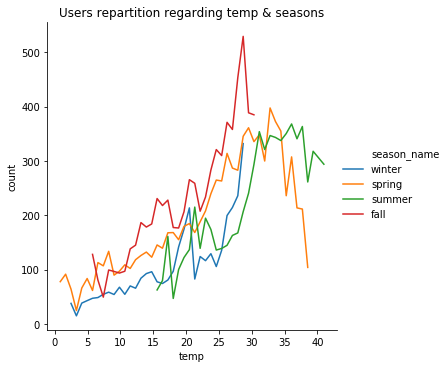

<Figure size 360x360 with 0 Axes>

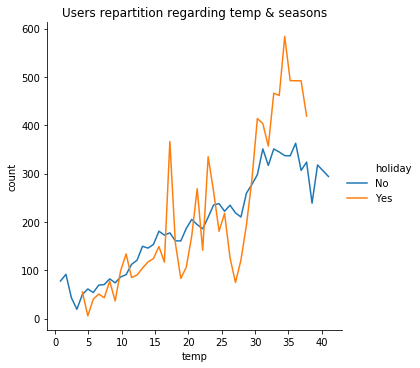

<Figure size 360x360 with 0 Axes>

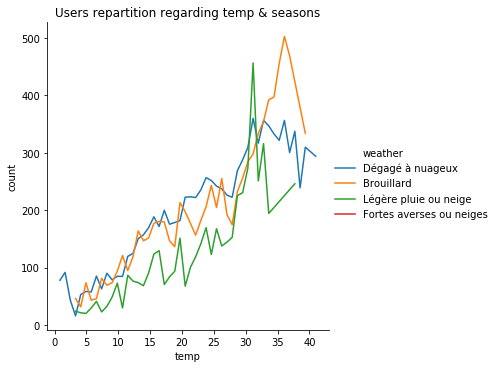

In [296]:
lst = ["workingday", "season_name", "holiday", "weather"]

for i in lst:
    plt.figure(figsize=(5,5))
    sns.relplot(x="temp", y="count", data=df, hue=df[i], kind="line", ci=None, aspect=1)
    plt.title("Users repartition regarding temp & seasons")
    plt.show()

<Figure size 360x360 with 0 Axes>

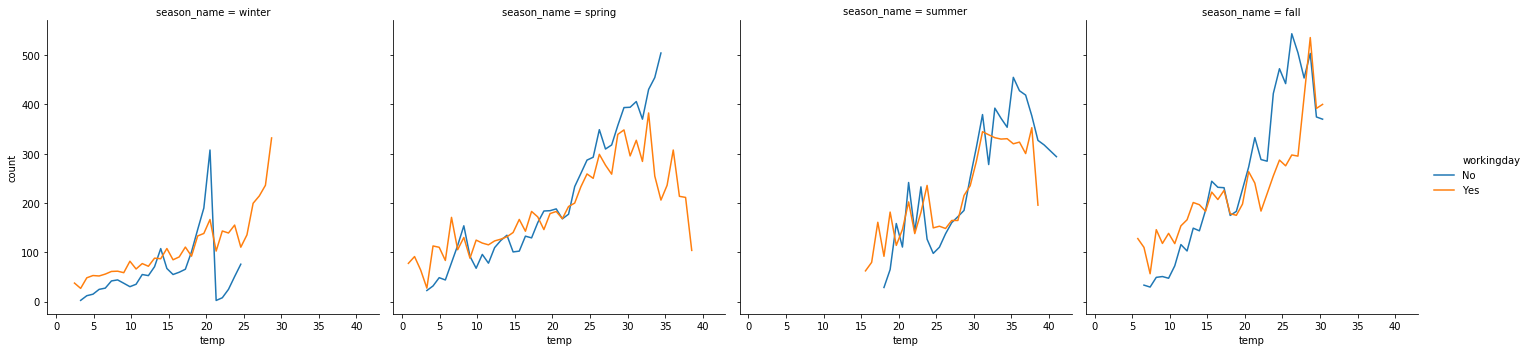

In [297]:
    plt.figure(figsize=(5,5))
    sns.relplot(x="temp", y="count", data=df, hue="workingday", col="season_name", kind="line", ci=None, aspect=1)
    plt.show()

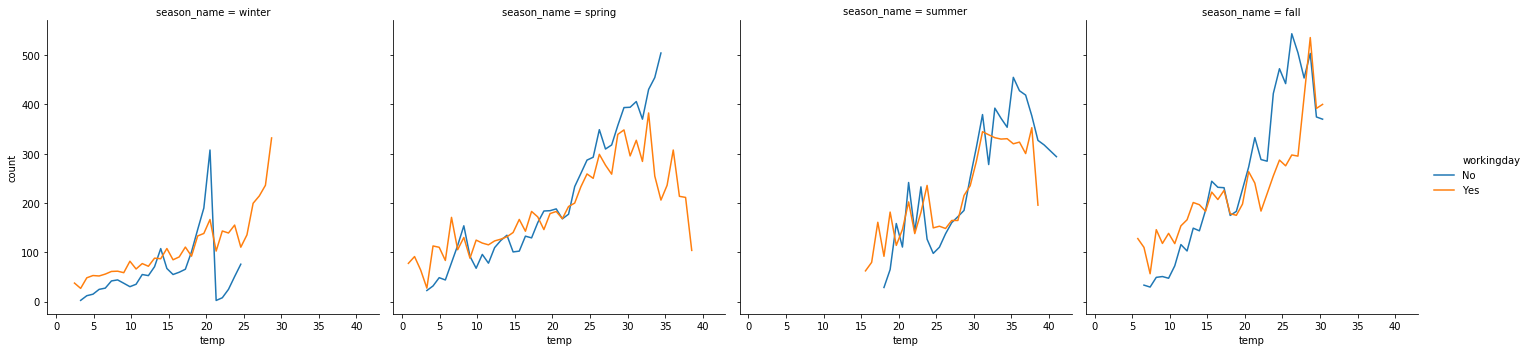

In [298]:
sns.relplot(x="temp", y="count", data=df, hue="workingday", col="season_name", kind="line", ci=None)

In [299]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,weekday_name,weekday,day,hour,season_name
0,2011-01-01 00:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday,5,1,0,winter
1,2011-01-01 01:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday,5,1,1,winter
2,2011-01-01 02:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday,5,1,2,winter
3,2011-01-01 03:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,3,10,13,2011,January,1,Saturday,5,1,3,winter
4,2011-01-01 04:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,0,1,1,2011,January,1,Saturday,5,1,4,winter


<Figure size 360x360 with 0 Axes>

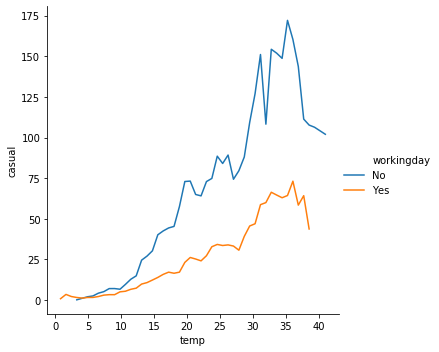

<Figure size 360x360 with 0 Axes>

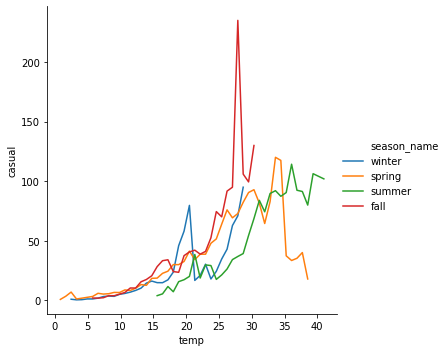

<Figure size 360x360 with 0 Axes>

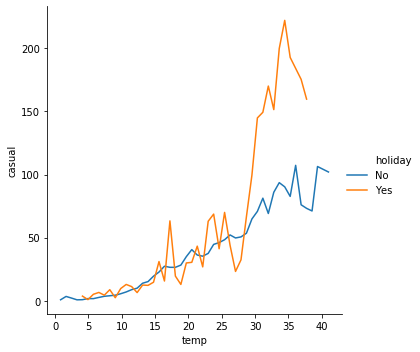

<Figure size 360x360 with 0 Axes>

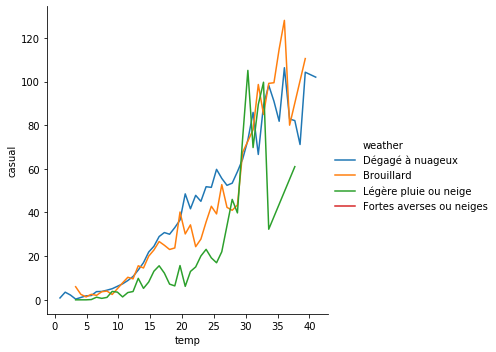

In [300]:
lst = ["workingday", "season_name", "holiday", "weather"]

for i in lst:
    plt.figure(figsize=(5,5))
    sns.relplot(x="temp", y="casual", data=df, hue=df[i], kind="line", ci=None, aspect=1)
    plt.show()

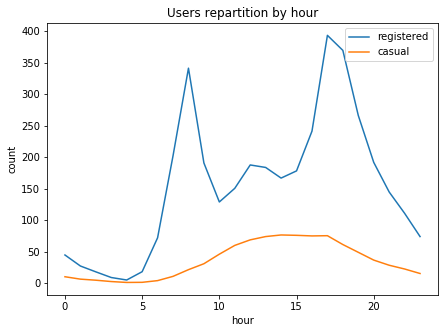

In [301]:
plt.figure(figsize=(7,5))
sns.lineplot(x="hour", y="registered", data=df, ci=None, label="registered")
sns.lineplot(x="hour", y="casual", data=df, ci=None, label="casual")

plt.title("Users repartition by hour")
plt.ylabel("count")
plt.legend()

plt.show()

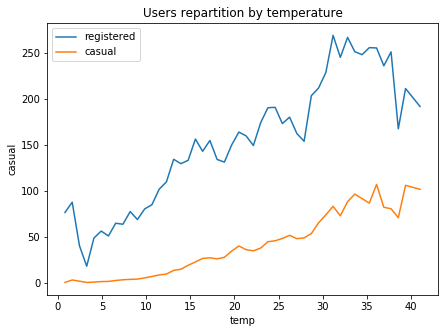

In [302]:
plt.figure(figsize=(7,5))
sns.lineplot(x="temp", y="registered", data=df, ci=None, label="registered")
sns.lineplot(x="temp", y="casual", data=df, ci=None, label="casual")

plt.title("Users repartition by temperature")
plt.legend()

plt.show()

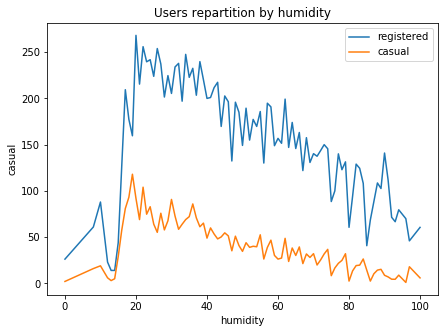

In [303]:
plt.figure(figsize=(7,5))
sns.lineplot(x="humidity", y="registered", data=df, ci=None, label="registered")
sns.lineplot(x="humidity", y="casual", data=df, ci=None, label="casual")

plt.title("Users repartition by humidity")
plt.legend()

plt.show()

In [304]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,weekday_name,weekday,day,hour,season_name
0,2011-01-01 00:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday,5,1,0,winter
1,2011-01-01 01:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday,5,1,1,winter
2,2011-01-01 02:00:00,1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday,5,1,2,winter
3,2011-01-01 03:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,3,10,13,2011,January,1,Saturday,5,1,3,winter
4,2011-01-01 04:00:00,1,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,0,1,1,2011,January,1,Saturday,5,1,4,winter


# Dummify and Scaling

In [305]:
# First of all, we want to select specific columns

new_df = df.drop(columns=["datetime", "season", "year", "weekday", "day"])

In [306]:
new_df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month_name,month,weekday_name,hour,season_name
0,No,No,Dégagé à nuageux,9.84,14.395,81,0.0,3,13,16,January,1,Saturday,0,winter
1,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,8,32,40,January,1,Saturday,1,winter
2,No,No,Dégagé à nuageux,9.02,13.635,80,0.0,5,27,32,January,1,Saturday,2,winter
3,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,3,10,13,January,1,Saturday,3,winter
4,No,No,Dégagé à nuageux,9.84,14.395,75,0.0,0,1,1,January,1,Saturday,4,winter


In [307]:
# Now we want to dummify categorical columns and scale numerical columns

cat_cols = ["holiday", "workingday", "weather", "month_name", "weekday_name", "season_name"]
num_cols = ["temp", "atemp", "humidity", "windspeed"]

dummy_df = pd.get_dummies(new_df[cat_cols], drop_first=True)
scaled_df = StandardScaler().fit_transform(new_df[num_cols])
scaled_df = pd.DataFrame.from_records(scaled_df)
scaled_df.columns = num_cols
scaled_df.head()

,temp,atemp,humidity,windspeed
0,-1.333661,-1.092737,0.993213,-1.567754
1,-1.438907,-1.182421,0.941249,-1.567754
2,-1.438907,-1.182421,0.941249,-1.567754
3,-1.333661,-1.092737,0.681430,-1.567754
4,-1.333661,-1.092737,0.681430,-1.567754


In [308]:
# Finally, we want to concatenate the two new dataframe
new_df = pd.concat([scaled_df, dummy_df], axis=1)

In [309]:
new_df.head()

,temp,atemp,humidity,windspeed,holiday_Yes,workingday_Yes,weather_Dégagé à nuageux,weather_Fortes averses ou neiges,weather_Légère pluie ou neige,month_name_August,...,month_name_September,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday,season_name_spring,season_name_summer,season_name_winter
0,-1.333661,-1.092737,0.993213,-1.567754,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,-1.438907,-1.182421,0.941249,-1.567754,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-1.438907,-1.182421,0.941249,-1.567754,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-1.333661,-1.092737,0.681430,-1.567754,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-1.333661,-1.092737,0.681430,-1.567754,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# ML Model

In [310]:
# We want to split the dataset between training and test dataset

X = new_df
y = df["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
print("Shape of X and y for training and test:")
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

Shape of X and y for training and test:
X_train: (8708, 29)
X_test: (2178, 29)
y_train: (8708,)
y_test: (2178,)


In [312]:
# Let's create a RandomForestRegressor Model
rfg = RandomForestRegressor()

# Now, we want to fit our model with X_train and y_train
rfg.fit(X_train, y_train)

# Finally, we want to make prediction from X_test
y_pred = rfg.predict(X_test)
y_pred

/Users/louisdreyfus/bin/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([336.6,  43. ,  76.1, ..., 354. ,  54. , 269.6])

In [313]:
# We want to evaluate our model

# Compute MAE, MSE, R2
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("R2: {}".format(r2))


MAE: 100.84595052254143
MSE: 20818.364311087258
R2: 144.28570376543638


In [314]:
score = rfg.score(X_test, y_test)

print("Accuracy: {}".format(score))

Accuracy: 0.3692730401812412


In [225]:
# The R2 is very high, I assume the model overfit on the data:

# We could do the following things:
# Try another model and see if it overfits as well
# Optimize the hyperparameters of the model
# Select few columns for our model